# Download do repositório

In [2]:
!git clone https://github.com/matterport/Mask_RCNN # puxhando a arquitetura;

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [3]:
%cd Mask_RCNN/ # pasta criada;

[Errno 2] No such file or directory: 'Mask_RCNN/ # pasta criada;'
/content


In [4]:
pwd

'/content'

In [5]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [6]:
%cd ..

/


In [7]:
pwd # diretório padrão;

'/'

# Importação das bibliotecas

In [8]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [9]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [10]:
tf.__version__

'1.15.2'

In [11]:
ROOT_DIR = os.path.abspath('./Mask_RCNN') # criando váriaveis da mask;
ROOT_DIR

'/Mask_RCNN'

In [12]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [13]:
sys.path.append(ROOT_DIR)

In [14]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/Mask_RCNN']

In [15]:
!pip install mrcnn

In [16]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

Using TensorFlow backend.


In [17]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))  # está na base de dados importada;

In [18]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/Mask_RCNN',
 '/',
 '/Mask_RCNN/samples/coco/']

In [19]:
import coco

In [20]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs') # diretório
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')  # essa seria a pasta das imagens que iremos utilizar para testar a segmentação.

In [21]:
MODEL_DIR, IMAGE_DIR

('/Mask_RCNN/logs', '/Mask_RCNN/images')

# Carregamento da rede neural pré-treinada

In [22]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')
COCO_MODEL_PATH

'/Mask_RCNN/mask_rcnn_coco.h5'

In [23]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [24]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [25]:
config = InferenceConfig()

In [26]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [27]:
MODEL_DIR

'/Mask_RCNN/logs'

In [28]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [29]:
COCO_MODEL_PATH

'/Mask_RCNN/mask_rcnn_coco.h5'

In [30]:
!pip install h5py

In [31]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

NameError: ignored

# Detecção de objetos

In [32]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [33]:
len(class_names)

81

In [34]:
class_names[2]

'bicycle'

In [35]:
class_names.index('bicycle')

2

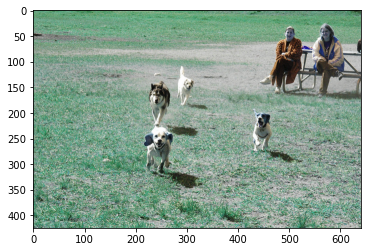

In [36]:
imagem = cv2.imread('/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg')
plt.imshow(imagem); # BGR

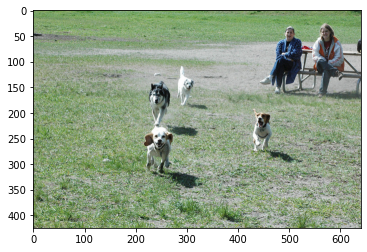

In [37]:
imagem = skimage.io.imread('/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg')
plt.imshow(imagem); # RGB

In [38]:
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

In [39]:
resultados = network.detect([imagem], verbose=0)
resultados

[{'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
   

In [40]:
r = resultados[0]

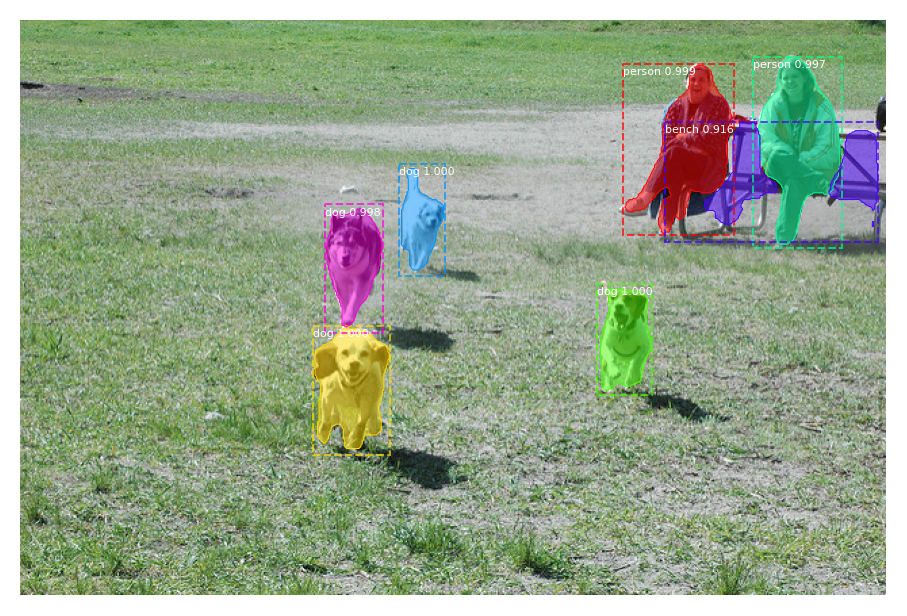

In [41]:
visualize.display_instances(imagem, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

# Remoção do fundo

In [42]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([1881596,   22404]))

In [43]:
r['masks']

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [44]:
def segmentar(imagem, r, indice):
  mask = r['masks'][:,:,indice]
  #print(mask)
  #print(mask.shape)
  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)
  mask = mask.astype('uint8')
  #print(mask)
  #print(mask.min(), mask.max())
  bg = 255 - mask * 255
  #print(bg)
  #print(bg.min(), bg.max())
  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = imagem * mask
  #print(mask_img)
  result = mask_img + bg
  return result, mask_show

In [45]:
segmentacao, mask_obj = segmentar(imagem, r, 0)

In [46]:
segmentacao

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [47]:
mask_obj

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [48]:
imagem.shape, 425 * 640

((425, 640, 3), 272000)

In [49]:
def mostra_segmentacao(imagem, r, indice, show_mask = False):
  segmentacao, mask_obj = segmentar(imagem, r, indice)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentacao], axis = 1))
  else:
    plt.imshow(np.concatenate([imagem, segmentacao], axis = 1))

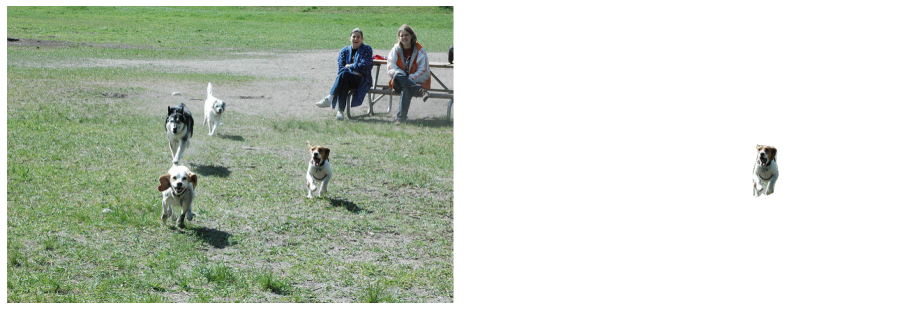

In [50]:
mostra_segmentacao(imagem, r, 0, False)

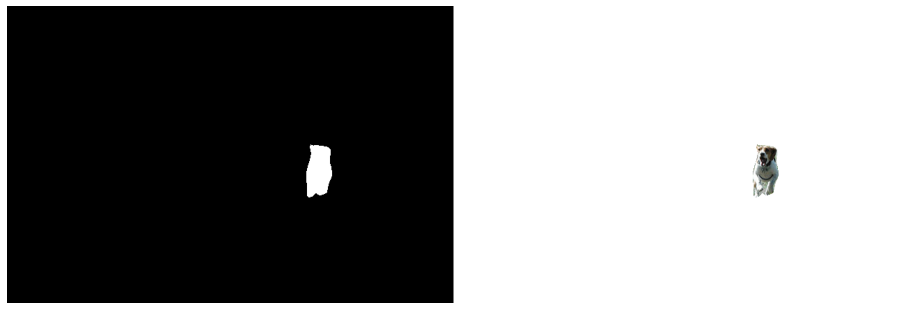

In [51]:
mostra_segmentacao(imagem, r, 0, True)

In [52]:
r['rois'], len(r['rois'])

(array([[195, 426, 277, 467],
        [226, 216, 321, 273],
        [106, 280, 189, 314],
        [ 32, 445, 159, 527],
        [136, 225, 231, 268],
        [ 27, 541, 168, 607],
        [ 75, 476, 164, 634]], dtype=int32), 7)

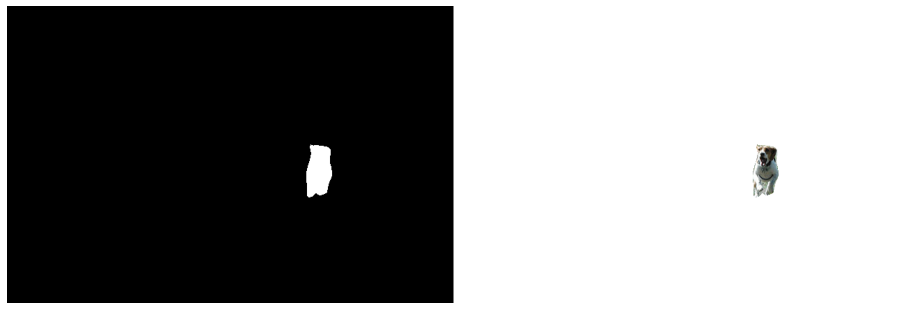

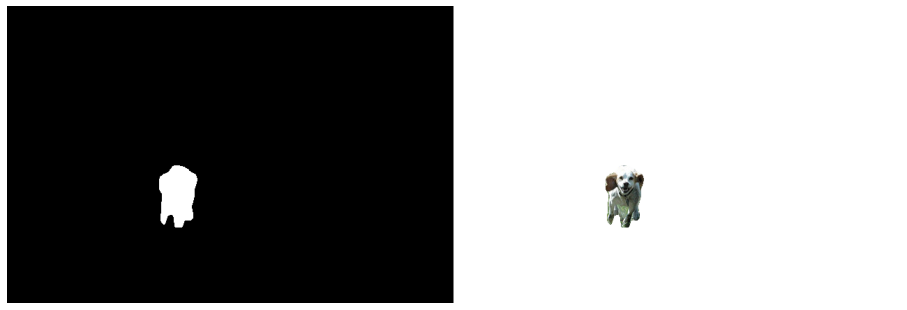

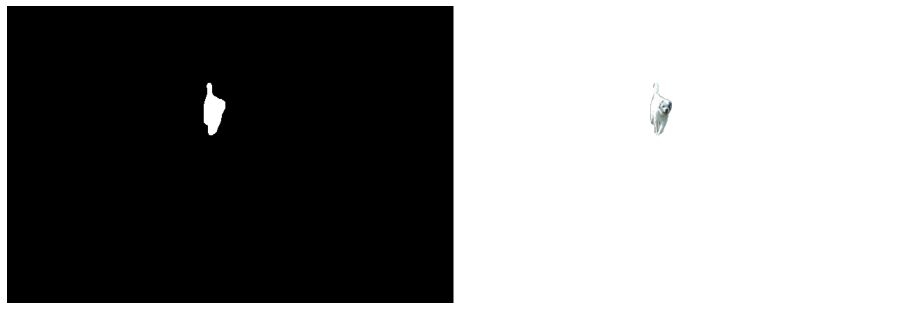

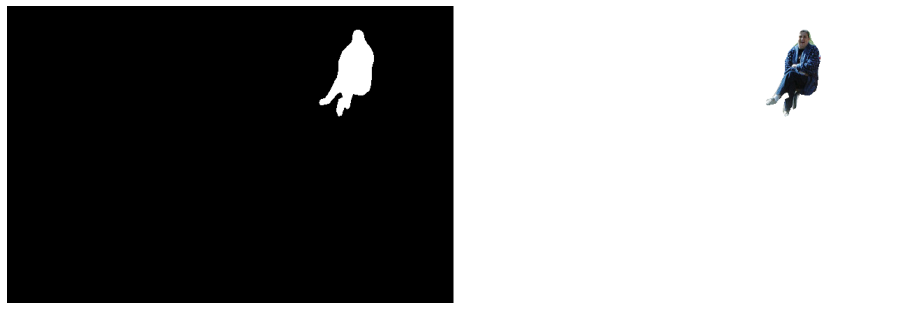

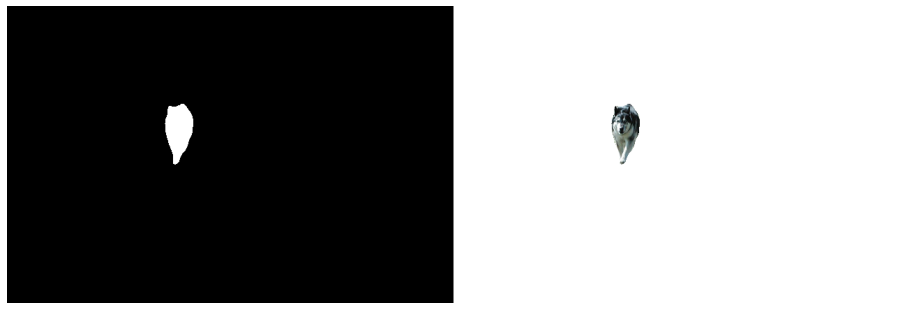

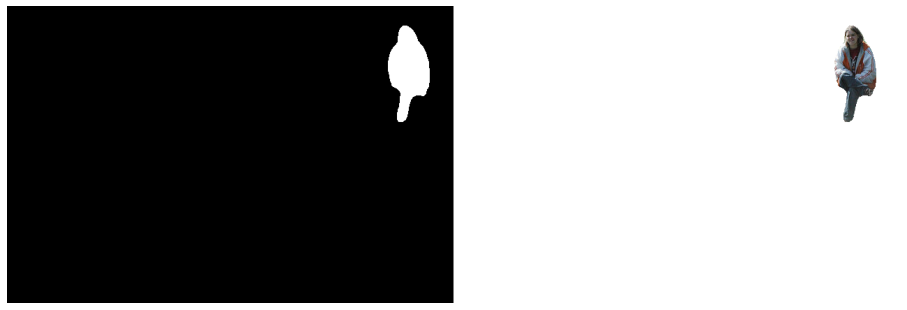

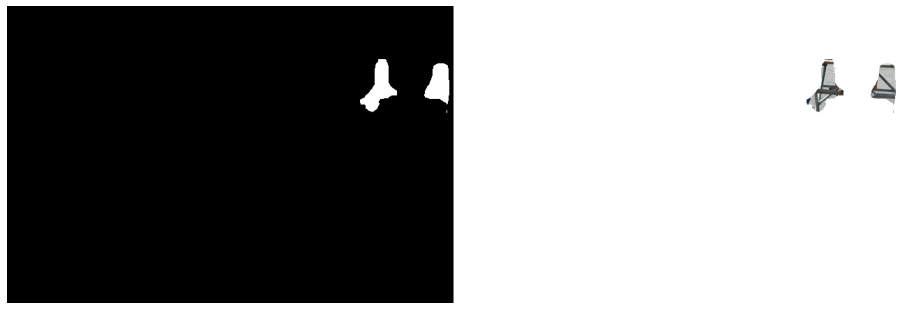

In [53]:
for indice in range(len(r['rois'])):
  #print(indice)
  mostra_segmentacao(imagem, r, indice, True)

# Exercício

In [54]:
imagens = [os.path.join('/content/Mask_RCNN/images', f) for f in os.listdir('/content/Mask_RCNN/images')]
imagens

['/content/Mask_RCNN/images/6821351586_59aa0dc110_z.jpg',
 '/content/Mask_RCNN/images/7581246086_cf7bbb7255_z.jpg',
 '/content/Mask_RCNN/images/3132016470_c27baa00e8_z.jpg',
 '/content/Mask_RCNN/images/8433365521_9252889f9a_z.jpg',
 '/content/Mask_RCNN/images/8053677163_d4c8f416be_z.jpg',
 '/content/Mask_RCNN/images/2502287818_41e4b0c4fb_z.jpg',
 '/content/Mask_RCNN/images/7933423348_c30bd9bd4e_z.jpg',
 '/content/Mask_RCNN/images/8239308689_efa6c11b08_z.jpg',
 '/content/Mask_RCNN/images/2383514521_1fc8d7b0de_z.jpg',
 '/content/Mask_RCNN/images/3651581213_f81963d1dd_z.jpg',
 '/content/Mask_RCNN/images/8512296263_5fc5458e20_z.jpg',
 '/content/Mask_RCNN/images/262985539_1709e54576_z.jpg',
 '/content/Mask_RCNN/images/3862500489_6fd195d183_z.jpg',
 '/content/Mask_RCNN/images/6584515005_fce9cec486_z.jpg',
 '/content/Mask_RCNN/images/12283150_12d37e6389_z.jpg',
 '/content/Mask_RCNN/images/25691390_f9944f61b5_z.jpg',
 '/content/Mask_RCNN/images/9118579087_f9ffa19e63_z.jpg',
 '/content/Mask_RCN

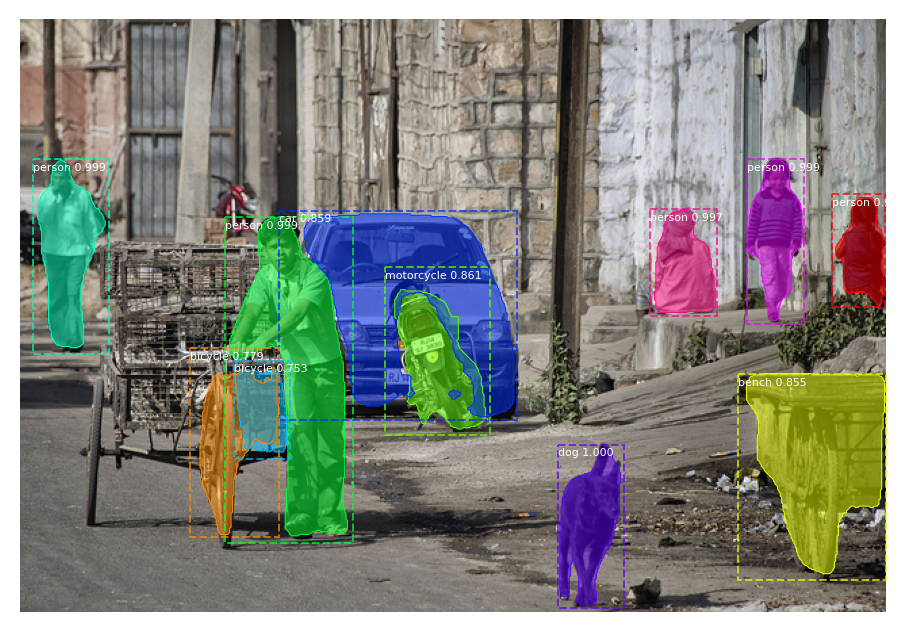

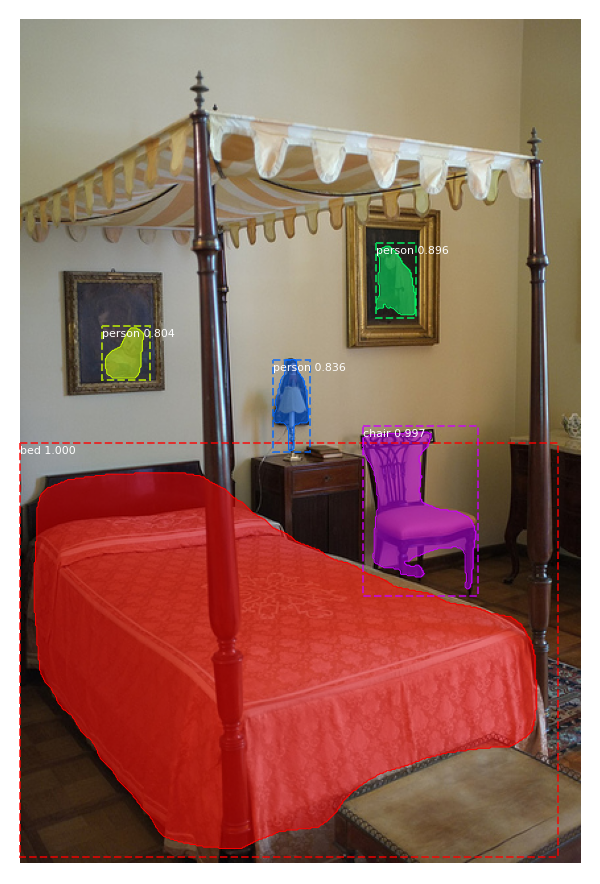

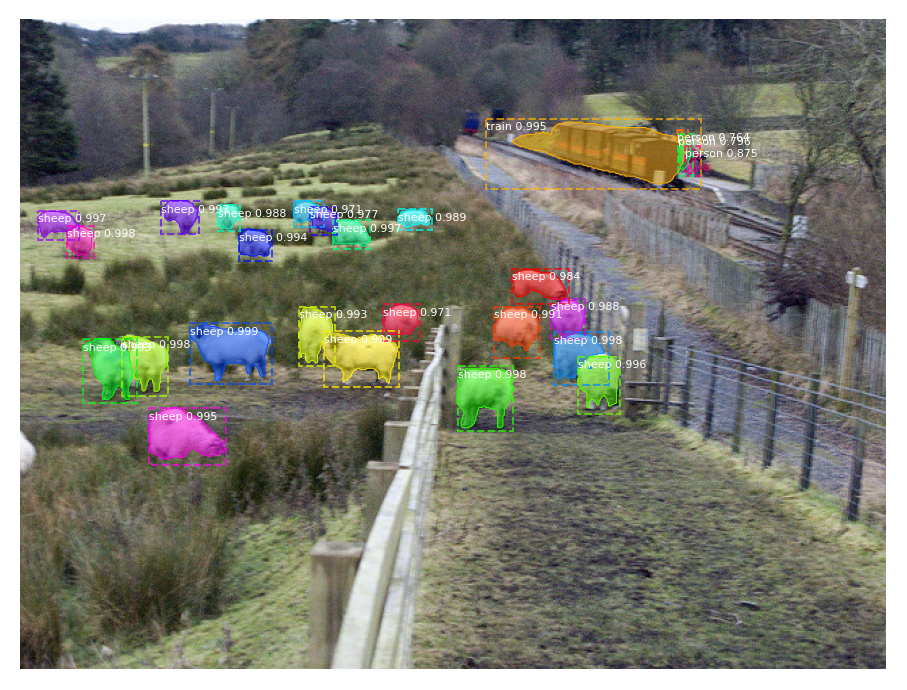

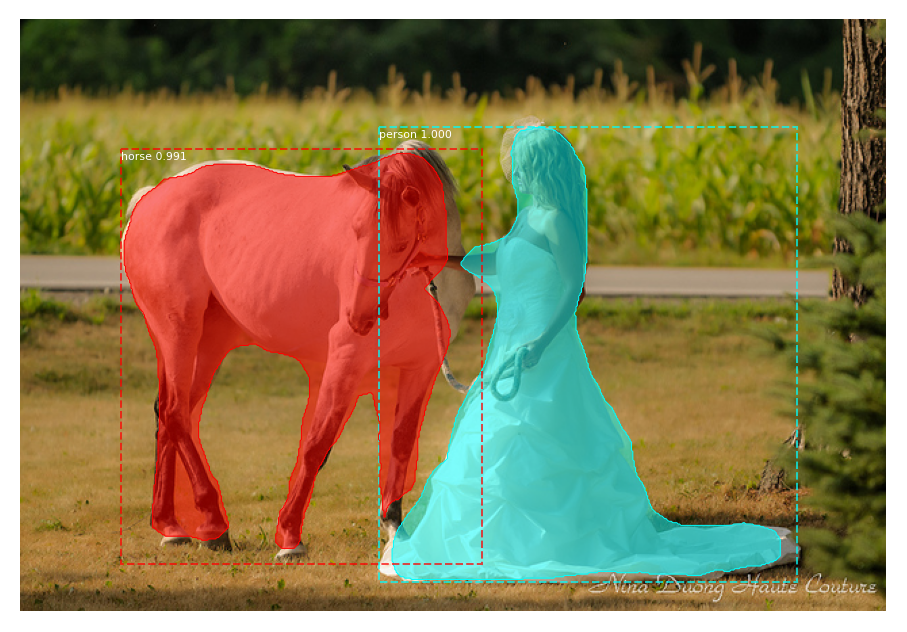

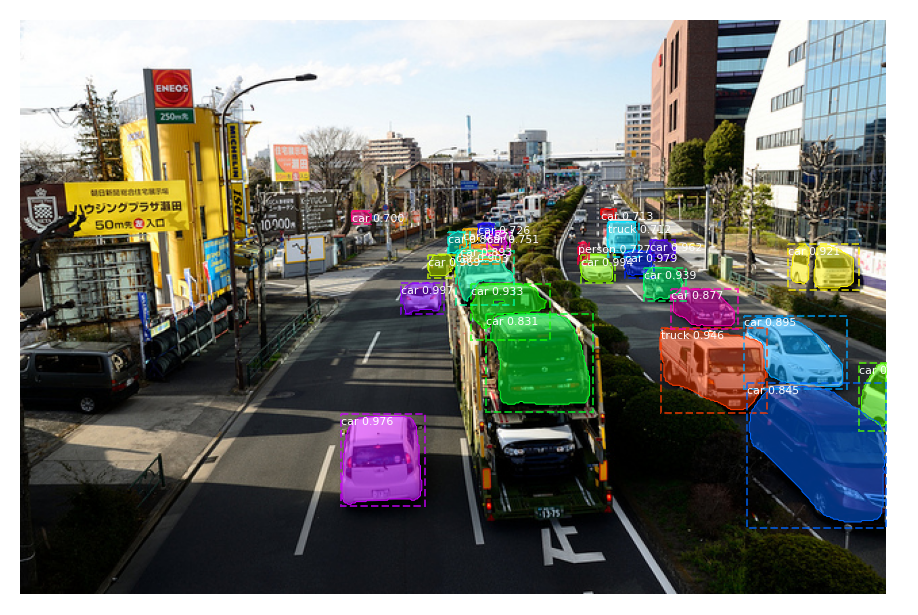

In [ ]:
for imagem in imagens:
  imagem_atual = skimage.io.imread(imagem)
    
  resultados = network.detect([imagem_atual], verbose=0)
  r = resultados[0]
  visualize.display_instances(imagem_atual, r['rois'], r['masks'], 
                              r['class_ids'], class_names, r['scores'])